In [82]:
import pandas as pd 
datos = pd.read_csv("C:/Users/URIEL/Documents/DATOS (CSV,XML,JSON,ETC)/datos.csv")

In [ ]:
#Ejercicio 7: 
#Dado el archivo datos.xlsx encuentra lo siguiente:
#La Fn(x) y escribela explicitamente.
#La grafica de Fn(x).
#En caso de usar el codigo que se dejo en las tareas anexalo, en caso contrario agrega tus procedimentos

In [13]:
def Funcion_Empirica(data):
    import numpy as np
    datos = list(data)
 
    import matplotlib.pyplot as plt
    dominio = []
    [dominio.append(x) for x in datos if x not in dominio]
    dominio.sort()
    n = len(datos)
    num_terminos = 0
    P = []
    for i in range(len(dominio)):
        if i < len(dominio) - 1:
            for j in range(len(datos)): 
                if (dominio[i] <= datos[j]) and (datos[j] < dominio[i+1]):
                    num_terminos += 1
        
        else:
            continue
        
    
        probabilidad = num_terminos/n
        P.append(probabilidad)
    
    P.append(1)
    P.sort()

    for i in range(len(dominio)):
        if i < len(dominio) - 1:
            x = np.linspace(dominio[i],dominio[i+1],100)
            y = np.linspace(P[i],P[i],100)
            plt.plot(x,y)
    
        elif i == len(dominio) - 1:
            x = np.linspace(dominio[i],dominio[i]+1,100)
            y = np.linspace(P[i],P[i],100)
            plt.plot(x,y)
        
    
    x = np.linspace(dominio[0]-1,dominio[0],100)
    y = np.linspace(0,0,100)  
    plt.plot(x,y)

    plt.ylabel("F(x)")
    plt.xlabel("x")
    plt.title("Funcion de Distribución Empírica")
    plt.show()

In [80]:

def Fn(data):
    datos = list(data)
    dominio = []
    [dominio.append(x) for x in datos if x not in dominio]
    dominio.sort()
    n = len(datos)
    num_terminos = 0
    P = []
    for i in range(len(dominio)):
        if i < len(dominio) - 1:
            for j in range(len(datos)): 
                if (dominio[i] <= datos[j]) and (datos[j] < dominio[i+1]):
                    num_terminos += 1
        
        else:
            continue
        
    
        probabilidad = num_terminos/n
        P.append(probabilidad)
    
    P.append(1)
    P.sort()

    Fn = {}
    Fn["x < {}".format(dominio[0])] = 0
    for i in range(len(dominio)):
        if i < len(dominio)-1:
            Fn["{} <= x < {}".format(dominio[i],dominio[i+1])] = P[i]
        else:
            Fn["x > {}".format(dominio[len(dominio)-1])] = 1
    return Fn

In [76]:
datos.head(5)

,muestra
0,1
1,3
2,4
3,4
4,8


In [81]:
Fn(datos.iloc[:,0].values)

{'x < 1': 0,
 '1 <= x < 2': 0.05,
 '2 <= x < 3': 0.175,
 '3 <= x < 4': 0.4,
 '4 <= x < 5': 0.625,
 '5 <= x < 6': 0.7,
 '6 <= x < 8': 0.875,
 'x > 8': 1}

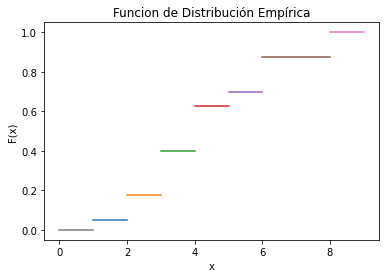

In [79]:
Funcion_Empirica(datos.iloc[:,0].values)

In [ ]:
#Ejercicio 8: Dado el archivo datos.xlsx encuentra lo siguiente:
#Prueba las siguientes hipotesis:
#La mediana es al menos 4 .
#El percentil .8 es a lo mas 6.

In [83]:
def Cuantil_Empirica(lista,p):
    datos = lista
    datos.sort()
    dominio = []
    [dominio.append(x) for x in datos if x not in dominio]
    dominio.sort()
    n = len(datos)
    num_terminos = 0
    P = []
    for i in range(len(dominio)):
        if i < len(dominio) - 1:
            for j in range(len(datos)): 
                if (dominio[i] <= datos[j]) and (datos[j] < dominio[i+1]):
                    num_terminos += 1
                    probabilidad = num_terminos/n
            if probabilidad == p or probabilidad>p:
                acumulado = dominio[i]
                break
        
        else:
            continue
        
    return acumulado

In [87]:
Cuantil_Empirica(datos.iloc[:,0].values.tolist(),.8)

6

In [88]:
#Mediana 
Cuantil_Empirica(datos.iloc[:,0].values.tolist(),.5)

4

In [2]:
#Ejercicio 9: Supon que tienes muestras de tamano 40:
#se plantea el siguiente intervalo (X(15), X(30)) para la mediana ¿cual es su nivel de confianza? .
#se plantea el siguiente intervalo (X(15), X(38)) para la tercer cuartil ¿cu ́al es su nivel de confianza? .
#se plantea el siguiente intervalo (X(2), X(25)) para el primer cuartil ¿cu ́al es su nivel de confianza?

In [1]:
def Combinatoria(x,y):
    import math
    combinatoria = math.factorial(x)/(math.factorial(y) * math.factorial(x-y))
    
    return int(combinatoria)

In [35]:
#P(X(k),X(s)) = confianza
from scipy import stats
def niv_confianza(xp,distribucion,k,s):
    suma = 0
    i=k
    while i<=s:
        suma = suma + (Combinatoria(40,i)*((distribucion.cdf(xp))**i)*((1-distribucion.cdf(xp))**(40-i)))
        i +=1
            
    return suma
        
    

In [36]:
def Cuantil_Distribucion_Continua(distribucion,p):
    import numpy as np 
    x_1 = np.linspace(distribucion.ppf(0.01),
                  distribucion.ppf(0.99), 100)
    fda_normal = distribucion.cdf(x_1) # Función de Distribución Acumulada
    
    for i in range(len(fda_normal)):
        if fda_normal[i] == p or fda_normal[i]>p:
            x_p = x_1[i]
            break
        else:
            continue
        
    return x_p

In [ ]:
#se plantea el siguiente intervalo (X(15), X(30)) para la mediana ¿cual es su nivel de confianza? .

In [37]:
mediana = Cuantil_Distribucion_Continua(stats.norm(10,1.2),0.5) 

In [38]:
 niv_confianza(mediana,stats.norm(10,1.2),15,30)

0.9684146615099787

In [39]:
#se plantea el siguiente intervalo (X(15), X(38)) para la tercer cuartil ¿cu ́al es su nivel de confianza? 
tercer_cuartil = Cuantil_Distribucion_Continua(stats.norm(10,1.2),0.75)

In [40]:
niv_confianza(tercer_cuartil,stats.norm(10,1.2),15,38)

0.9998395464602865

In [42]:
#se plantea el siguiente intervalo (X(2), X(25)) para el primer cuartil ¿cu ́al es su nivel de confianza?
primer_cuartil = Cuantil_Distribucion_Continua(stats.norm(10,1.2),0.25)

In [43]:
niv_confianza(primer_cuartil,stats.norm(10,1.2),2,25)

0.9999229389855361

In [44]:
def Cuantil_Distribucion_Discreta(distribucion1,p):
    import numpy as np 
    discreta1 = distribucion1.ppf(0.01)
    discreta2 = distribucion1.ppf(0.99)
    x_1 =  np.arange(discreta1,discreta2)
    fmp = distribucion1.cdf(x_1) # Función de Distribucion
    for i in range(len(fmp)):
        if fmp[i] == p or fmp[i]>p:
            cuantil = x_1[i]
            break
            
    return cuantil

In [46]:
#se plantea el siguiente intervalo (X(15), X(30)) para la mediana ¿cual es su nivel de confianza? .

In [47]:
mediana = Cuantil_Distribucion_Discreta(stats.binom(10,0.3),0.5)

In [52]:
niv_confianza(mediana,stats.binom(10,0.3),15,30)

0.9360873851482628